# Homework Assignment Number One | Darren L.

In [1221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Section 1: Police killings

In [1222]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 14 columns):
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                   467 non-null object
county_income           467 non-null int64
dtypes: int64(4), object(10)
memory usage: 54.7+ KB


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [1223]:
killings.columns

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'lawenforcementagency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [1224]:
killings.rename(columns={"raceethnicity":"race"}, inplace=True)
killings.rename(columns={"lawenforcementagency":"agency"}, inplace=True)
killings.head()

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 2. Show the count of missing values in each column

In [1225]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [1226]:
address = killings.streetaddress

In [1227]:
address.fillna("unknown", inplace=True)

In [1228]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 4. How many killings were there in March and April?

In [1229]:
killings.groupby("month").count()

,name,age,gender,race,day,year,streetaddress,city,state,agency,cause,armed,county_income
month,,,,,,,,,,,,,
April,96,96,96,96,96,96,96,96,96,96,96,96,96
February,84,84,84,84,84,84,84,84,84,84,84,84,84
January,90,90,90,90,90,90,90,90,90,90,90,90,90
June,2,2,2,2,2,2,2,2,2,2,2,2,2
March,114,114,114,114,114,114,114,114,114,114,114,114,114
May,81,81,81,81,81,81,81,81,81,81,81,81,81


In [1230]:
march_killings = (killings.month == "March").sum()
print march_killings

114


In [1231]:
april_killings = (killings.month == "April").sum()
print april_killings

96


In [1232]:
march_and_april_killings = (march_killings + april_killings)
print "There were {} killings total for the months of March and April.".format(march_and_april_killings)

There were 210 killings total for the months of March and April.


### 5. How many male and how many female victims are there?

In [1233]:
male = (killings.gender == "Male").sum()
print "There were {} male victims.".format(male)

There were 445 male victims.


In [1234]:
female = (killings.gender == "Female").sum()
print "There were {} male victims.".format(female)

There were 22 male victims.


### 6. How many killings were of unarmed people?

In [1235]:
killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [1236]:
unarmed_killings = (killings.armed == "No").sum()
print "There were {} killings of unarmed people".format(unarmed_killings)

There were 102 killings of unarmed people


### 7. What percentage of all killings were unarmed?

In [1237]:
killings.armed.value_counts(normalize=True) *100

Firearm               49.250535
No                    21.841542
Knife                 14.561028
Other                  5.567452
Vehicle                3.854390
Non-lethal firearm     2.997859
Unknown                1.498929
Disputed               0.428266
Name: armed, dtype: float64

22% of all killings were unarmed.

### 8. What are the 5 states with the most killings?

In [1238]:
killings.state.value_counts(sort=True)[:5]

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [1239]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

In [1240]:
a = killings.age

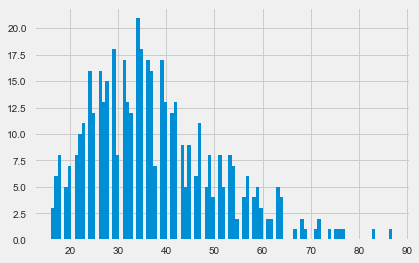

In [1241]:
plt.style.use("fivethirtyeight")
plt.hist(a, bins = 100)
plt.show();

### 11. Show histogram of ages for each race

In [1242]:
white = killings[killings.race == "White"]
black = killings[killings.race == "Black"]
hispanic_latino = killings[killings.race == "Hispanic/Latino"]
unknown = killings[killings.race == "Unknown"]
asian_pacific_islander = killings[killings.race == "Asian/Pacific Islander"] 
native_american = killings[killings.race == "Native American"]

In [1243]:
#Let's see if the new dataframes worked before we plot it.
black.describe()

,age,day,year,county_income
count,135.000000,135.000000,135.0,135.000000
mean,34.044444,15.081481,2015.0,54181.881481
std,11.440871,9.045533,0.0,14532.791029
min,16.000000,1.000000,2015.0,22545.000000
25%,26.000000,7.000000,2015.0,45322.000000
50%,32.000000,15.000000,2015.0,50792.000000
75%,40.500000,22.500000,2015.0,57645.500000
max,77.000000,31.000000,2015.0,110292.000000


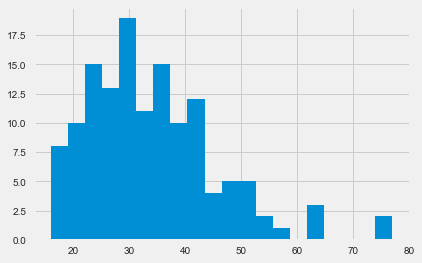

In [1244]:
#plot to check the histogram for Black only.
plt.hist(black.age, bins=20);

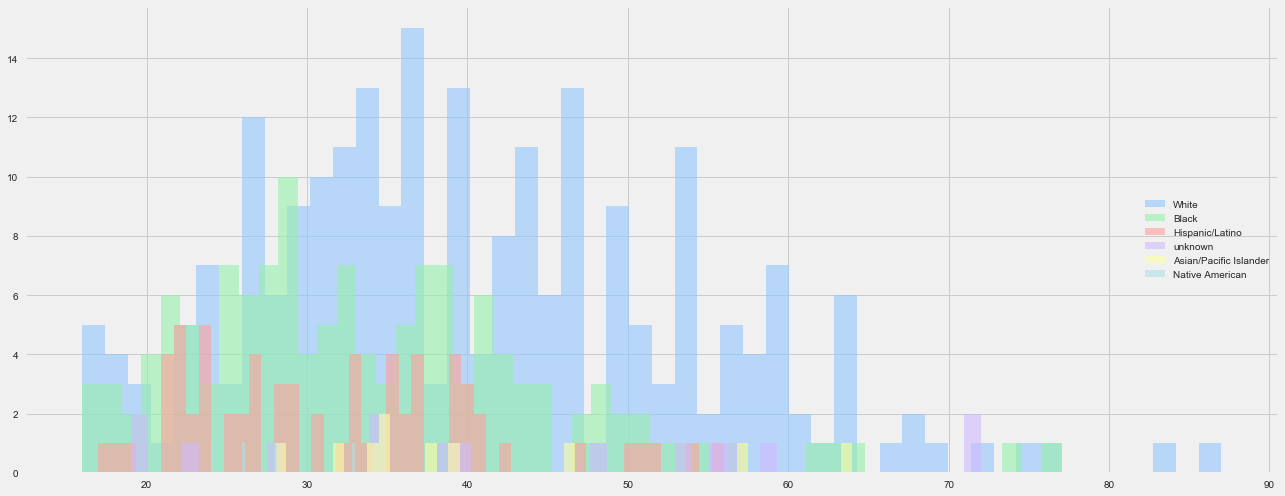

In [1430]:
#plotting age by all of the races in one histogram.
plt.figure(figsize=(20,8))

kwargs = dict(bins=50, alpha= .6)

plt.hist(white.age, label = "White", **kwargs)
plt.hist(black.age, label = "Black", **kwargs)
plt.hist(hispanic_latino.age,label = "Hispanic/Latino", **kwargs)
plt.hist(unknown.age, label = "unknown", **kwargs)
plt.hist(asian_pacific_islander.age, label = "Asian/Pacific Islander", **kwargs)
plt.hist(native_american.age, label = "Native American", **kwargs)
plt.legend(loc='right')
plt.show;

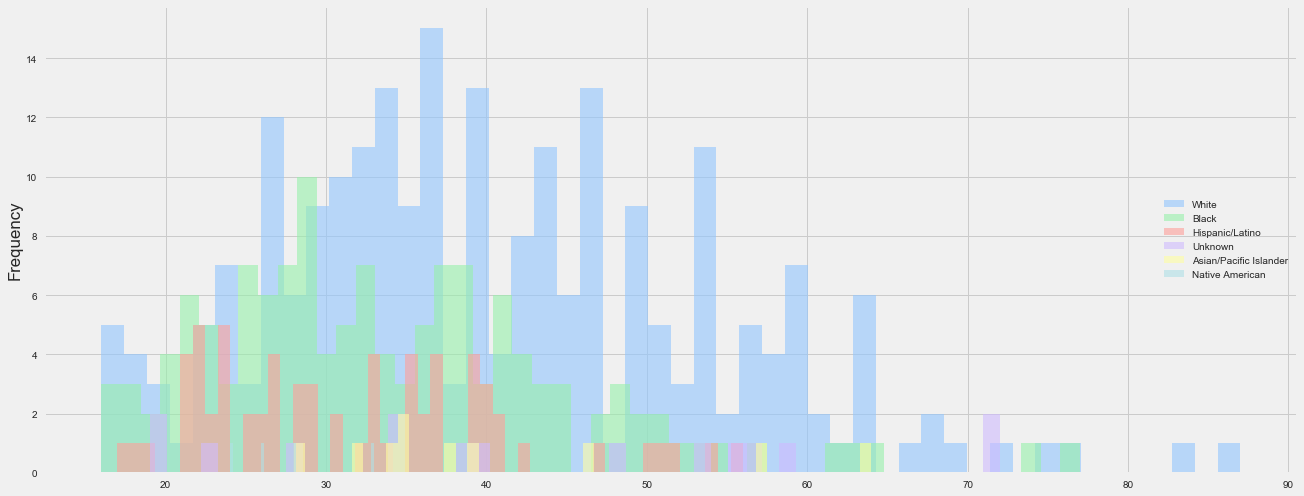

In [1431]:
#same plot using Pandas
plt.figure(figsize=(20,8))

white.age.plot(label= "White", kind="hist", bins = 50, legend = True, alpha = .6)
black.age.plot(label= "Black", kind="hist", bins = 50, legend = True, alpha = .6)
hispanic_latino.age.plot(label= "Hispanic/Latino", kind="hist", bins = 50, legend = True, alpha = .6)
unknown.age.plot(label= "Unknown", kind="hist", bins = 50, legend = True, alpha = .6)
asian_pacific_islander.age.plot(label= "Asian/Pacific Islander", kind="hist", bins = 50, legend = True, alpha = .6)
native_american.age.plot(label= "Native American", kind="hist", bins = 50, legend = True, alpha = .6)
plt.legend(loc='right')
plt.show();

### 12. What is the average age of death by race?

In [1248]:
avg_age_death_by_race = killings.groupby("race").mean()["age"]
print avg_age_death_by_race

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64


### 13. Show a bar chart with counts of deaths every month

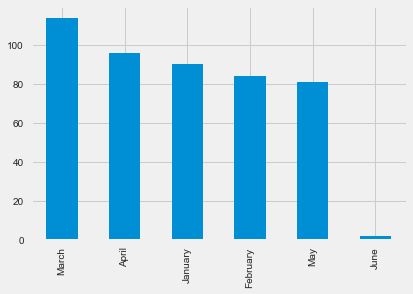

In [1249]:
counts_of_death_by_month = killings.month.value_counts()
counts_of_death_by_month.plot(kind="bar");

## Section 2: College Majors

In [1250]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 11 columns):
Major_code                       173 non-null int64
Major                            173 non-null object
Major_category                   173 non-null object
Total                            173 non-null int64
Employed                         173 non-null int64
Employed_full_time_year_round    173 non-null int64
Unemployed                       173 non-null int64
Unemployment_rate                173 non-null float64
Median                           173 non-null int64
P25th                            173 non-null int64
P75th                            173 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 16.2+ KB


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [1251]:
majors.drop("Major_code", axis = 1, inplace=True)

In [1252]:
majors.drop("Employed_full_time_year_round", axis = 1, inplace=True)

In [1253]:
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [1254]:
majors.columns = majors.columns.str.lower()
majors.head()

,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [1255]:
majors.set_index("major", inplace=True)

### 2. Show the count of missing values in each column

In [1256]:
majors.isnull().sum()

major_category       0
total                0
employed             0
unemployed           0
unemployment_rate    0
median               0
p25th                0
p75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [1257]:
df1 = majors.sort_values(by="total", ascending=False)[:10]
df1

,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
major,,,,,,,,
BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000.0
GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000.0
ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000.0
NURSING,Health,1769892,1325711,36503,0.026797,62000,48000,80000.0
PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000.0
ELEMENTARY EDUCATION,Education,1446701,819393,32685,0.038359,40000,31000,50000.0
GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000.0
MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000.0
ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000.0


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


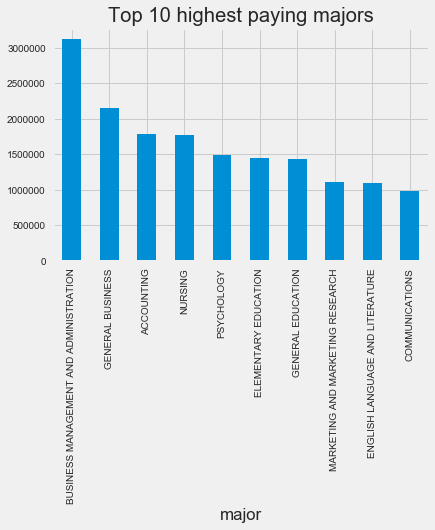

In [1258]:
df1.total.plot(kind="bar", use_index= True, title = "Top 10 highest paying majors")
plt.show();

In [1259]:
#Double check with groupby to eliminate any duplicates in major column
df2 = majors.groupby('major')['total'].mean().sort_values(ascending=False)[:10]
df2

major
BUSINESS MANAGEMENT AND ADMINISTRATION    3123510
GENERAL BUSINESS                          2148712
ACCOUNTING                                1779219
NURSING                                   1769892
PSYCHOLOGY                                1484075
ELEMENTARY EDUCATION                      1446701
GENERAL EDUCATION                         1438867
MARKETING AND MARKETING RESEARCH          1114624
ENGLISH LANGUAGE AND LITERATURE           1098647
COMMUNICATIONS                             987676
Name: total, dtype: int64

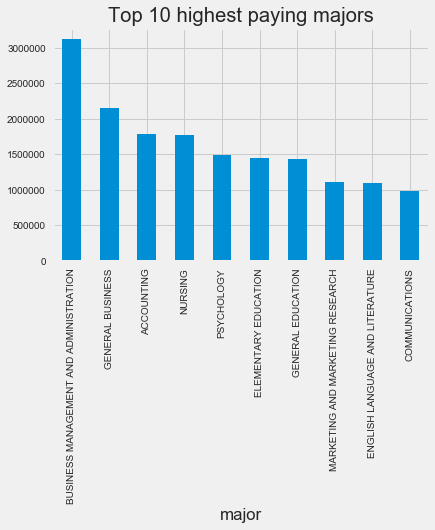

In [1260]:
df2.plot(kind="bar", title = "Top 10 highest paying majors");

### 5. What is the average median salary for each major category?

In [1261]:
avg_median_salary_by_major_cat = majors.groupby("major_category")["median"].mean().sort_values(ascending=False)
avg_median_salary_by_major_cat

major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: median, dtype: float64

### 6. Visualize only the top 5 paying major categories

In [1262]:
top_5_paying_major_cat = majors.groupby("major_category")["median"].mean().sort_values(ascending=False).head()

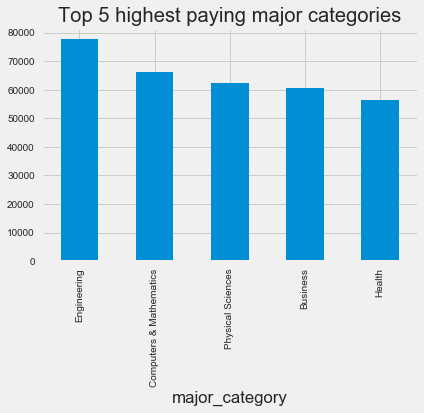

In [1263]:
top_5_paying_major_cat.plot(kind="bar", title = "Top 5 highest paying major categories")

plt.show();

### 7. Plot a histogram of the distribution of median salaries

In [1264]:
majors.rename(columns = {"median" : "med"}, inplace = True)
majors.head()

,major_category,total,employed,unemployed,unemployment_rate,med,p25th,p75th
major,,,,,,,,
GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


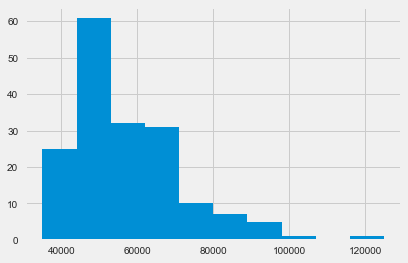

In [1265]:
plt.hist(majors.med)
plt.show();

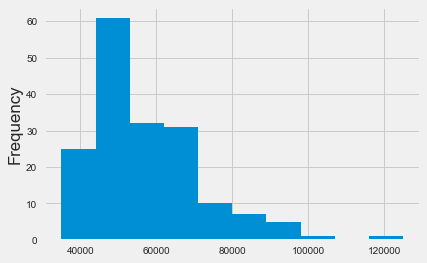

In [1266]:
mm = majors.med
mm.plot(kind="hist")
plt.show();

### 8. Plot a histogram of the distribution of median salaries by major category

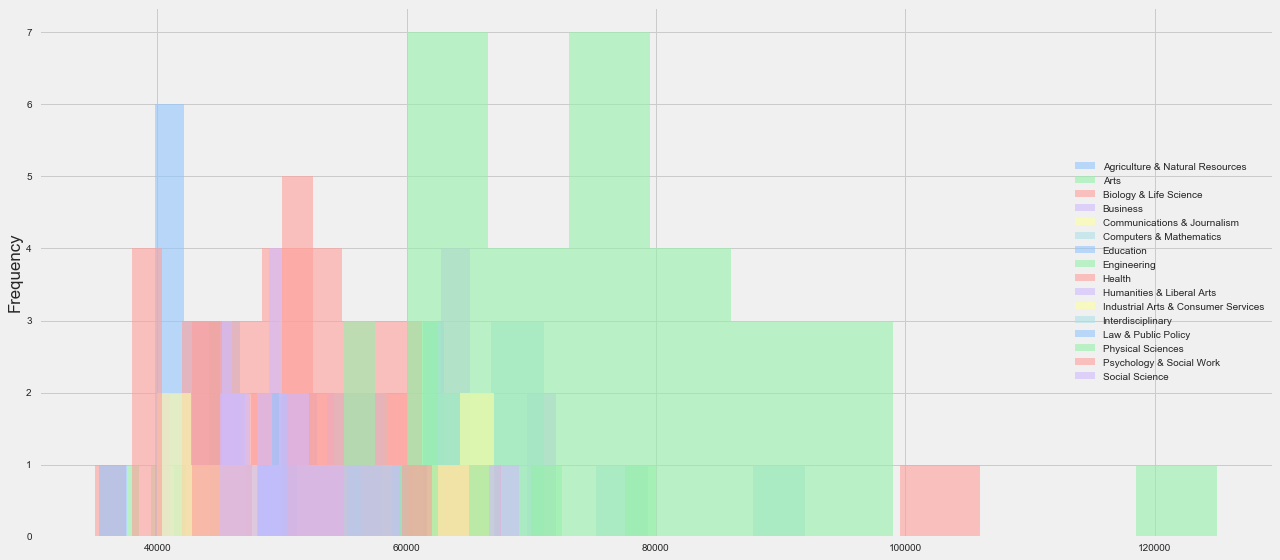

In [1435]:
plt.style.use("seaborn-pastel")
med_sal_by_catg = majors.groupby("major_category")["med"]
plt.figure(figsize = (18, 8))

med_sal_by_catg.plot(kind="hist", alpha = .6)
plt.legend(loc = 'right')
plt.tight_layout()
plt.show();

### 9. What are the top 10 most UNemployed majors?

In [1269]:
majors.sort_values(by="unemployment_rate", ascending=False)[:10]

,major_category,total,employed,unemployed,unemployment_rate,med,p25th,p75th
major,,,,,,,,
MISCELLANEOUS FINE ARTS,Arts,8511,6431,1190,0.156147,45000,30000,60000.0
CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,587,0.102712,45000,26100,62000.0
MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,187,0.101796,64000,39750,90000.0
SCHOOL STUDENT COUNSELING,Education,2396,1492,169,0.101746,41000,33200,50000.0
LIBRARY SCIENCE,Education,16193,7091,743,0.094843,40000,30000,55000.0
VISUAL AND PERFORMING ARTS,Arts,55141,41098,4297,0.094658,40000,27000,59000.0
COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,2265,0.090264,60000,40000,85000.0
SOCIAL PSYCHOLOGY,Psychology & Social Work,10871,6897,660,0.087336,47000,35000,70000.0
ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,320,0.086022,80000,40000,106000.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [1270]:
majors.groupby("major_category")["unemployment_rate"].mean().sort_values(ascending=False)[:10]

major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: unemployment_rate, dtype: float64

## Section 3: FIFA Soccer Game data

In [1271]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [1272]:
#Replace cm with empty string and overwrite Height column
fifa.Height.str
fifa["Height"] = fifa.Height.str.replace("cm", "")
fifa["Height"] = fifa.Height.astype(float)

In [1273]:
#Replace kg with empty string and overwrite Weight column
fifa.Weight.str
fifa["Weight"] = fifa.Weight.str.replace("kg", "")
fifa["Weight"] = fifa.Weight.astype(float)

In [1274]:
#function to lower, set index, and drop columns
def fifa_fe(fifa):
    fifa.columns = fifa.columns.str.lower()
    fifa.set_index("name", inplace = True)
    fifa.drop(["national_position", "national_kit", "club_kit", "club_joining", "contract_expiry"], axis = 1, inplace = True)
    fifa.drop(["gk_positioning", "gk_diving", "gk_kicking", "gk_handling", "gk_reflexes"], axis = 1, inplace = True) 
    return fifa

fifa_fe(fifa).head()

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185.0,80.0,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,RW,93,170.0,72.0,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,LW,92,174.0,68.0,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,ST,92,182.0,85.0,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193.0,92.0,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11


In [1275]:
(fifa.club_position == "GK").sum()

632

In [1276]:
#creating a data frame to keep players that are not goal keepers. This dataframe will have 632 less records.
fifa2 = fifa[fifa.club_position != 'GK']
fifa2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16956 entries, Cristiano Ronaldo to Barry Richardson
Data columns (total 42 columns):
nationality           16956 non-null object
club                  16956 non-null object
club_position         16955 non-null object
rating                16956 non-null int64
height                16956 non-null float64
weight                16956 non-null float64
preffered_foot        16956 non-null object
birth_date            16956 non-null object
age                   16956 non-null int64
preffered_position    16956 non-null object
work_rate             16956 non-null object
weak_foot             16956 non-null int64
skill_moves           16956 non-null int64
ball_control          16956 non-null int64
dribbling             16956 non-null int64
marking               16956 non-null int64
sliding_tackle        16956 non-null int64
standing_tackle       16956 non-null int64
aggression            16956 non-null int64
reactions             16956 non-null int6

In [1277]:
#creating a new data frame to keep players with score greater than or equal to 70.
fifa3 = fifa2[fifa2.rating >= 70]
fifa3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5232 entries, Cristiano Ronaldo to Anatole Ngamukol
Data columns (total 42 columns):
nationality           5232 non-null object
club                  5232 non-null object
club_position         5231 non-null object
rating                5232 non-null int64
height                5232 non-null float64
weight                5232 non-null float64
preffered_foot        5232 non-null object
birth_date            5232 non-null object
age                   5232 non-null int64
preffered_position    5232 non-null object
work_rate             5232 non-null object
weak_foot             5232 non-null int64
skill_moves           5232 non-null int64
ball_control          5232 non-null int64
dribbling             5232 non-null int64
marking               5232 non-null int64
sliding_tackle        5232 non-null int64
standing_tackle       5232 non-null int64
aggression            5232 non-null int64
reactions             5232 non-null int64
attacking_position 

In [1278]:
fifa3.isnull().sum()

nationality           0
club                  0
club_position         1
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing             0
long_shots            0
curve                 0
freekick_accuracy     0
penalties             0
volleys         

In [1279]:
fifa3.dropna(axis=0, inplace= True)

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1280]:
fifa3.isnull().sum()

nationality           0
club                  0
club_position         0
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing             0
long_shots            0
curve                 0
freekick_accuracy     0
penalties             0
volleys         

In [1281]:
#check to see if null record is dropped.
fifa3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5231 entries, Cristiano Ronaldo to Anatole Ngamukol
Data columns (total 42 columns):
nationality           5231 non-null object
club                  5231 non-null object
club_position         5231 non-null object
rating                5231 non-null int64
height                5231 non-null float64
weight                5231 non-null float64
preffered_foot        5231 non-null object
birth_date            5231 non-null object
age                   5231 non-null int64
preffered_position    5231 non-null object
work_rate             5231 non-null object
weak_foot             5231 non-null int64
skill_moves           5231 non-null int64
ball_control          5231 non-null int64
dribbling             5231 non-null int64
marking               5231 non-null int64
sliding_tackle        5231 non-null int64
standing_tackle       5231 non-null int64
aggression            5231 non-null int64
reactions             5231 non-null int64
attacking_position 

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [1282]:
#Top 5 players for Speed:
fifa3.speed.sort_values(ascending=False).head()

name
Jonathan Biabiany            96
Pierre-Emerick Aubameyang    96
Gareth Bale                  95
Ernest Asante                95
Williams                     95
Name: speed, dtype: int64

In [1283]:
#Top 5 players for marking:
fifa3.marking.sort_values(ascending=False).head()

name
Giorgio Chiellini    92
Thiago Silva         90
Jérôme Boateng       90
Andrea Barzagli      90
Miranda              89
Name: marking, dtype: int64

In [1284]:
#Top 5 players for finishing:
fifa3.finishing.sort_values(ascending=False).head()

name
Lionel Messi          95
Luis Suárez           94
Cristiano Ronaldo     93
Gonzalo Higuaín       92
Robert Lewandowski    91
Name: finishing, dtype: int64

### 3. Who is the tallest French lefted foot player?

In [1397]:
fifa3[(fifa3.preffered_foot == "Left") & (fifa3.nationality == "France")].sort_values("height", ascending = False).head(3)
#Romain Thomas is the Tallest French, Left footed player.

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Romain Thomas,France,Angers SCO,LCB,78,193.0,84.0,Left,06/12/1988,28,CB,...,54,68,79,60,19,24,39,34,52,18
Olivier Giroud,France,Arsenal,Sub,83,192.0,88.0,Left,09/30/1986,30,ST,...,59,82,88,84,84,76,70,65,81,82
Jérémy Taravel,France,FC Sion,Sub,71,191.0,85.0,Left,04/17/1987,29,CB,...,53,63,72,72,37,33,38,57,50,35


### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [1287]:
fifa3.corr()["rating"]

rating                1.000000
height                0.031355
weight                0.037766
age                   0.043735
weak_foot             0.128486
skill_moves           0.197929
ball_control          0.324058
dribbling             0.247239
marking               0.067274
sliding_tackle        0.091544
standing_tackle       0.107487
aggression            0.156163
reactions             0.690226
attacking_position    0.220396
interceptions         0.126365
vision                0.306819
composure             0.436876
crossing              0.209043
short_pass            0.367006
long_pass             0.307635
acceleration          0.128840
speed                 0.130594
stamina               0.175219
strength              0.105597
balance               0.081555
agility               0.145819
jumping               0.107216
heading               0.173646
shot_power            0.248798
finishing             0.213504
long_shots            0.228673
curve                 0.241254
freekick

### 5. Make a heatmap of the dataset's correlation table

In [1288]:
import seaborn as sns

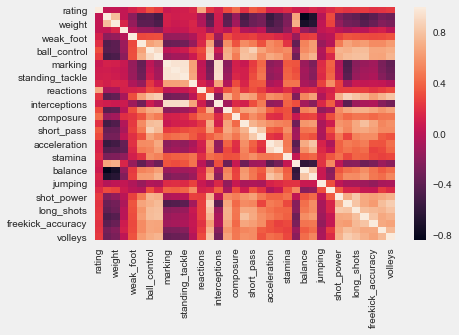

In [1289]:
sns.heatmap(fifa3.corr());

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa_2. From now on we'll be using fifa_2

In [1290]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [1291]:
fifa3.club.nunique()

508

In [1292]:
#Now lets check to see if a value in content "is in" club
fifa3.club.isin(clubs_list)

name
Cristiano Ronaldo             True
Lionel Messi                  True
Neymar                        True
Luis Suárez                   True
Robert Lewandowski            True
Gareth Bale                   True
Zlatan Ibrahimović            True
Jérôme Boateng                True
Eden Hazard                   True
Luka Modrić                   True
Mesut Özil                    True
Gonzalo Higuaín               True
Thiago Silva                  True
Sergio Ramos                  True
Sergio Agüero                 True
Paul Pogba                    True
Antoine Griezmann            False
Kevin De Bruyne               True
Marco Reus                    True
Alexis Sánchez                True
Toni Kroos                    True
Diego Godín                  False
Mats Hummels                  True
Giorgio Chiellini             True
Philipp Lahm                  True
Pepe                          True
Iniesta                       True
James Rodríguez               True
Pierre-Emerick 

In [1293]:
#Return new data frame
fifa_2 = fifa3[fifa3.club.isin(clubs_list)]
fifa_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, Cristiano Ronaldo to Bogdan Lobonţ
Data columns (total 42 columns):
nationality           268 non-null object
club                  268 non-null object
club_position         268 non-null object
rating                268 non-null int64
height                268 non-null float64
weight                268 non-null float64
preffered_foot        268 non-null object
birth_date            268 non-null object
age                   268 non-null int64
preffered_position    268 non-null object
work_rate             268 non-null object
weak_foot             268 non-null int64
skill_moves           268 non-null int64
ball_control          268 non-null int64
dribbling             268 non-null int64
marking               268 non-null int64
sliding_tackle        268 non-null int64
standing_tackle       268 non-null int64
aggression            268 non-null int64
reactions             268 non-null int64
attacking_position    268 non-null int64
in

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

In [1294]:
avg_atr = ["long_shots", "curve", "dribbling"]

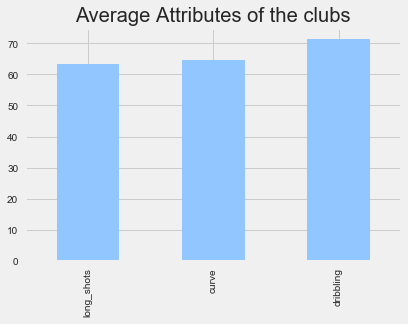

In [1295]:
avg_bar_plot = fifa_2.mean()[avg_atr]
avg_bar_plot.plot(kind="bar", title = "Average Attributes of the clubs");

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

In [1304]:
color_dict = {"Left":"g", "Right":"y"}
colors = fifa_2.preffered_foot.map(color_dict)

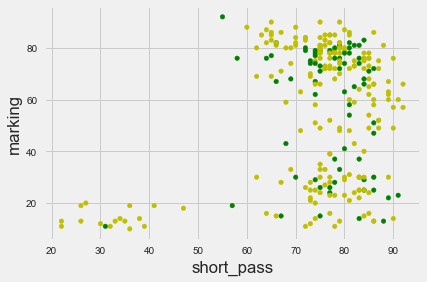

In [1305]:
fifa_2.plot(x = "short_pass", y = "marking", c = colors, kind = "scatter")
plt.show();

In [1307]:
fifa_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, Cristiano Ronaldo to Bogdan Lobonţ
Data columns (total 42 columns):
nationality           268 non-null object
club                  268 non-null object
club_position         268 non-null object
rating                268 non-null int64
height                268 non-null float64
weight                268 non-null float64
preffered_foot        268 non-null object
birth_date            268 non-null object
age                   268 non-null int64
preffered_position    268 non-null object
work_rate             268 non-null object
weak_foot             268 non-null int64
skill_moves           268 non-null int64
ball_control          268 non-null int64
dribbling             268 non-null int64
marking               268 non-null int64
sliding_tackle        268 non-null int64
standing_tackle       268 non-null int64
aggression            268 non-null int64
reactions             268 non-null int64
attacking_position    268 non-null int64
in

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

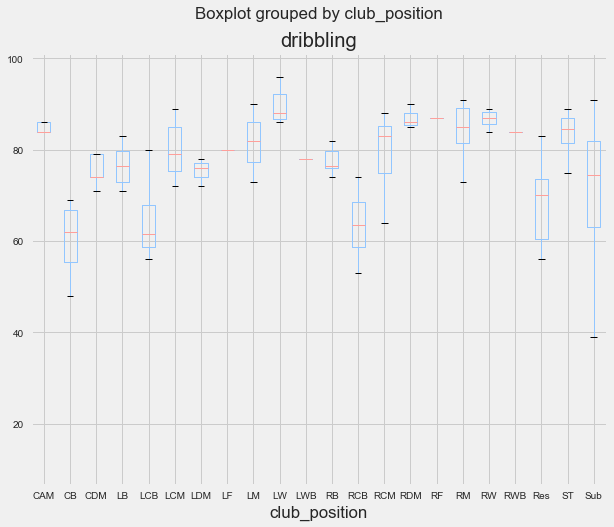

In [1337]:
#Dribbling boxplot
fifa_2.boxplot(column="dribbling", by="club_position", figsize=(10, 8))
plt.show();

Which position is better at dribbling? ST or RCM? Why?

The ST position is better at dribbling. RCM has a much larger spread than ST, and therefore higher variance within each player's dribbling score. 
Eventhough the median is about the same for both positions, the range and IQR are much smaller in ST. 
This also shows that there's less variance in ST, with a smaller number of outliers compared to RCM.

What is the IQR for positions ST, RB, and RM?
IQR_ST_dribbling ~ 6
IQR_RB_dribbling ~ 4
IQR_RM_dribbling ~ 8

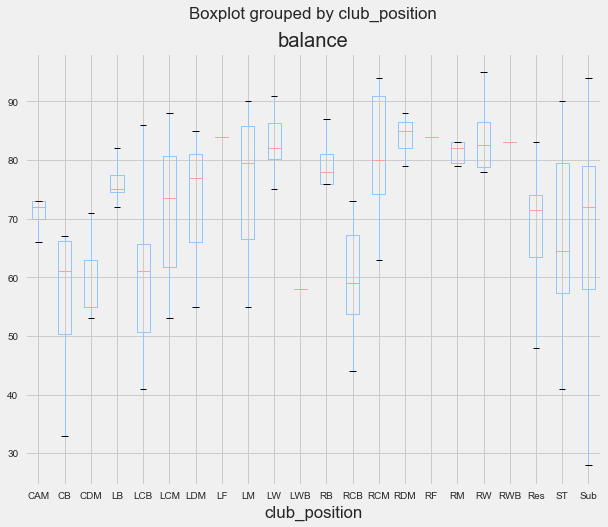

In [1338]:
#Balance boxplot
fifa_2.boxplot(column="balance", by="club_position", figsize=(10, 8))
plt.show();

Which position is better at balance? LM or LDM? Why?

The range, and IQR is larger in LM, although the median is slightly higher in LM. 
~75% of those in LM have a higher balance score than 75% of those in LDM.

What is the IQR for positions ST, RB, and RM?
IQR_ST_balance ~ 20
IQR_RB_balance ~ 6
IQR_RM_balance ~ 4

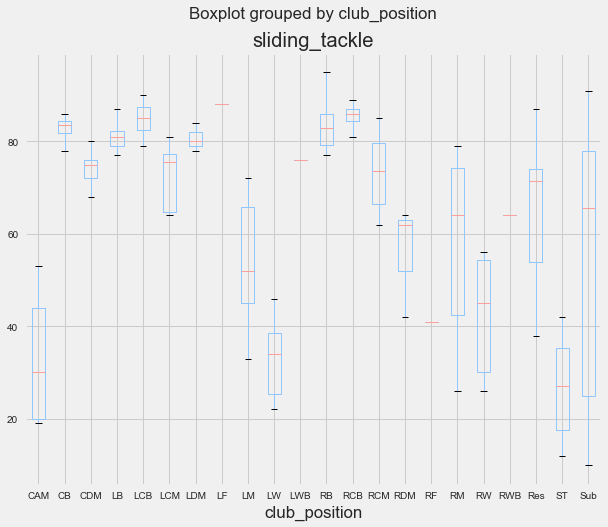

In [1339]:
#sliding_tackle boxplot
fifa_2.boxplot(column="sliding_tackle", by="club_position", figsize=(10, 8))
plt.show();

What is the IQR for positions ST, RB, and RM?
IQR_ST_sliding_tackle ~ 18
IQR_RB_sliding_tackle ~ 8
IQR_RM_sliding_tackle ~ 30

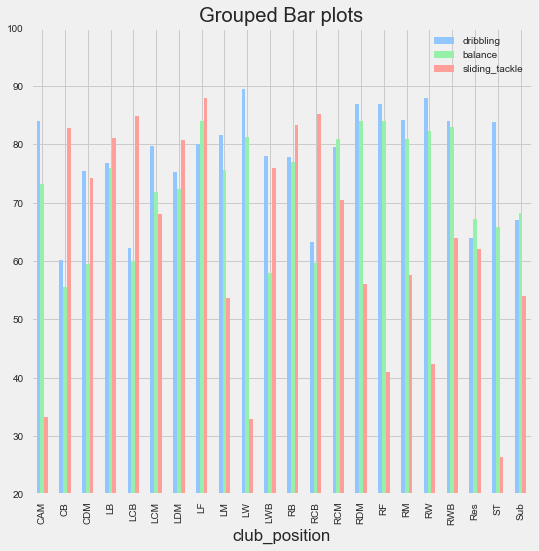

In [1396]:
#taking a look at the attributes via averages instead of the boxplot view.

col_att = ["dribbling", "balance", "sliding_tackle"]
fifa_2.groupby("club_position")[col_att].mean().plot(kind="bar", figsize=(8,8), 
                                           title = "Grouped Bar plots")
plt.ylim(20, 100)
plt.show();